In [26]:
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from typing import Annotated,Literal

In [27]:
class TypedDictState(TypedDict):
   name:str
   game:Literal['chess','football','cricket']

In [34]:
import random
def play_game(state:TypedDictState):
    games = ['cricket', 'football', 'chess']
    chosen_game = random.choice(games)
    print(f"Player wants to play {chosen_game}")
    return {"name": state['name'], "game": chosen_game}

def cricket(state: TypedDictState):
    print("cricket node called")
    return {"name": state['name'] , "game": 'cricket'}

def football(state: TypedDictState):
    print("football node called")
    return {"name": state['name'] , "game": 'football'}

def chess(state: TypedDictState):
    print("chess node called")
    return {"name": state['name'] , "game": 'chess'}

def route_play(state:TypedDictState):
    print("route_play node called")

    if state['game'] == 'cricket':
        return 'cricket'
    elif state['game'] == 'football':
        return 'football'
    elif state['game'] == 'chess':
        return 'chess'
    else:
        raise ValueError("Invalid game choice")

In [35]:
from langgraph.graph import StateGraph, START, END

graph = StateGraph(TypedDictState)
#nodes
graph.add_node("play_game",play_game)
graph.add_node("cricket",cricket)
graph.add_node("football",football)
graph.add_node("chess",chess)

#edges
graph.add_edge(START,"play_game")
graph.add_conditional_edges("play_game", route_play,
                            {
                                'cricket': 'cricket',
                                'football': 'football',
                                'chess': 'chess'
                            })
graph.add_edge("cricket",END)
graph.add_edge("football",END)
graph.add_edge("chess",END)

graph_builder = graph.compile()

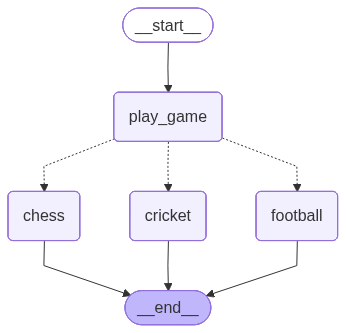

In [30]:
from IPython.display import display, Image
## visualize graph as mermaid diagram
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [31]:
graph_builder.invoke({"name":"Kirti"})

Player wants to play football
route_play node called
football node called


{'name': 'Kirti is Playing ', 'game': 'football'}

In [ ]:
# it should raise validation error that int is passed instead of str, it should be failing at runtime 
# but not failing hence pydantic validation is used.
graph_builder.invoke({"name":123}) 


Player wants to play chess
route_play node called
chess node called


{'name': 123, 'game': 'chess'}

In [38]:
#dataclasses provide another way to define structure data. offers a concise syntax for defining classes with attributes.primarily used to store and manage data.
from dataclasses import dataclass

@dataclass
class DataclassState:
   name:str
   game:Literal['chess','football','cricket']| None = None

import random
def play_game(state:DataclassState):
    games = ['cricket', 'football', 'chess']
    chosen_game = random.choice(games)
    print(f"Player wants to play {chosen_game}")
    return {"name": state.name, "game": chosen_game}

def cricket(state: DataclassState):
    print("cricket node called")
    return {"name": state.name, "game": 'cricket'}

def football(state: DataclassState):
    print("football node called")
    return {"name": state.name , "game": 'football'}

def chess(state: DataclassState):
    print("chess node called")
    return {"name": state.name , "game": 'chess'}

def route_play(state: DataclassState):
    print("route_play node called")

    if state.game == "cricket":
        return "cricket"
    elif state.game == "football":
        return "football"
    elif state.game == "chess":
        return "chess"
    else:
        raise ValueError("Invalid game choice")


graph = StateGraph(DataclassState)
#nodes
graph.add_node("play_game",play_game)
graph.add_node("cricket",cricket)
graph.add_node("football",football)
graph.add_node("chess",chess)

#edges
graph.add_edge(START,"play_game")
graph.add_conditional_edges("play_game", route_play,
                            {
                                'cricket': 'cricket',
                                'football': 'football',
                                'chess': 'chess'
                            })
graph.add_edge("cricket",END)
graph.add_edge("football",END)
graph.add_edge("chess",END)

graph_builder = graph.compile()


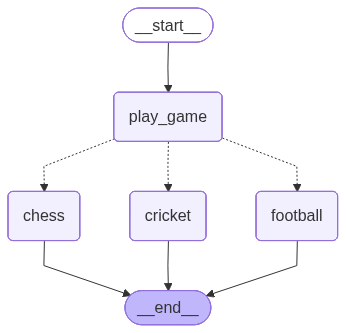

In [39]:
from IPython.display import display, Image
## visualize graph as mermaid diagram
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [ ]:
graph_builder.invoke(DataclassState(name ="Kirti",game='chess')) #default value given is chess but random function chooses cricket

Player wants to play cricket
route_play node called
cricket node called


{'name': 'Kirti', 'game': 'cricket'}

In [41]:
#pydantic validation is done here
from pydantic import BaseModel

class State(BaseModel):
   name:str

def name_only(state:State):
   print(f"Hello {state.name}")
   return {"name": state.name}

graph = StateGraph(State)
graph.add_node("name_only",name_only)
graph.add_edge(START,"name_only")
graph.add_edge("name_only",END)
graph_builder = graph.compile()
graph_builder.invoke({"name":"Kirti"})



Hello Kirti


{'name': 'Kirti'}

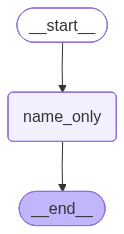

In [43]:
from IPython.display import display, Image
## visualize graph as mermaid diagram
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [ ]:
#runtime error should be raised here as int is passed instead of str
graph_builder.invoke({'name':123})

ValidationError: 1 validation error for State
name
  Input should be a valid string [type=string_type, input_value=123, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/string_type